In [1]:
!pip install tensorly

In [755]:
import tensorly 
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from numpy import linalg as la

In [875]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig, 3 test)
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

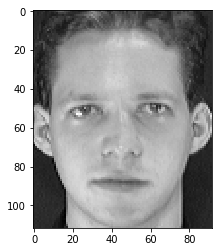

In [876]:
plt.imshow(np.reshape(tensor_immagini_traning[:,0,0],(112,92)), cmap='gray')

In [877]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

Text(0,0.5,'Singular values')

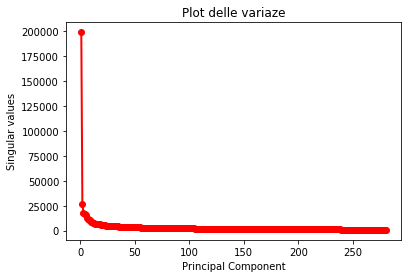

In [878]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(280) + 1
plt.plot(sing_vals, s1, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

Text(0,0.5,'Singular values')

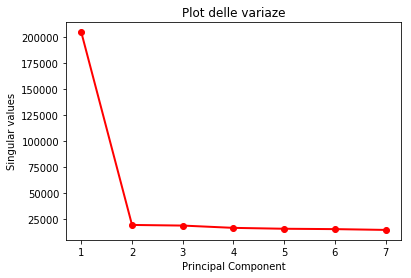

In [879]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(7) + 1
plt.plot(sing_vals, s2, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

In [880]:
num_eigenpixel = 10

In [881]:
num_eigenperson = 2 #(massimo 7)

In [882]:
eigenpixel = np.zeros((10304,num_eigenpixel))
for i in range (num_eigenpixel):
    eigenpixel[:,i] = U1[:,i]

In [883]:
eigenperson = np.zeros((7,num_eigenperson))
for i in range (num_eigenperson):
    eigenperson[:,i] = U2[:,i]

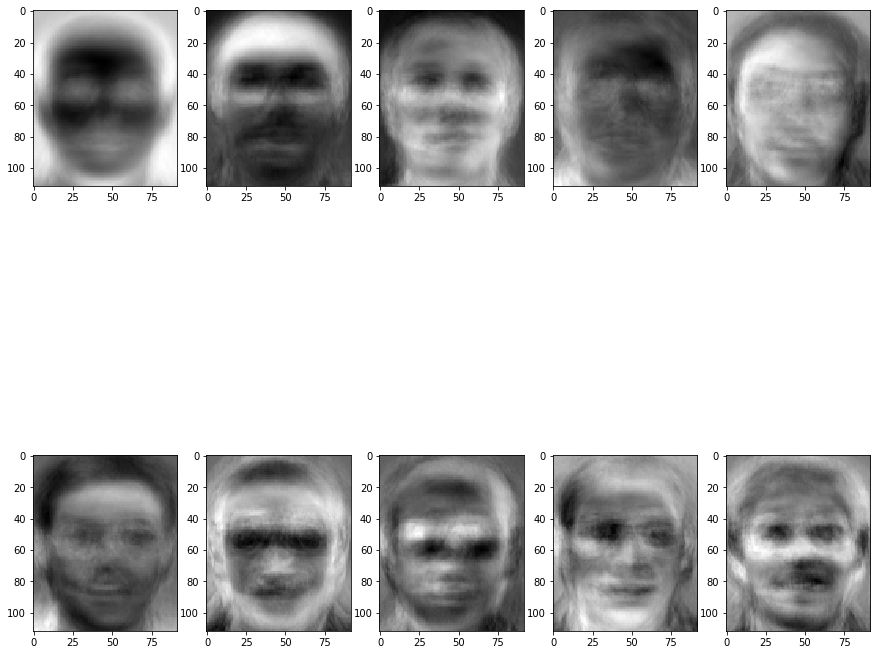

In [884]:
fig = plt.figure(figsize=(15,15))
for i in range (num_eigenpixel):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(eigenpixel[:,i],(112,92)), cmap='gray')

In [885]:
S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(eigenpixel), mode=0)
S=tensorly.tenalg.mode_dot(S, np.transpose(eigenperson), mode=1)
#S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)

In [886]:
immagine_test = np.reshape(plt.imread(("../Data-set/s1/10.pgm")), (1,10304))

In [887]:
immagine_test_tens = immagine_test.dot(eigenpixel)

In [888]:
core_basis = np.zeros((40))
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    core_basis[i] =  np.linalg.norm(U1[:,0] - immagine_test_tens, 2)

In [889]:
core_basis.argmin()

15

In [890]:
core_basis = np.zeros((num_eigenpixel,40))#calcoliamo basi una per ognuna delle 40 persone(prendiamo solo il primo vettore singolare sinistro della svd sulle slice frontali dove ogni slice rappresenta una persona)
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    core_basis[:,i] =  U1[:,0]

In [891]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

In [892]:
tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(eigenpixel), mode=0)#proietto d*Uj

In [893]:
residui_minimi = np.zeros((40,3))
residui = np.zeros(40)
for i in range(40):#persone
    for j in range(3):#immagini stessa persona classificate una alla volta
        for k in range(40):
            residui[k] =  np.linalg.norm(core_basis[:,k] -tensor_immagini_testj[:,j,i] , 2)
        residui_minimi[i,j] = residui.argmin()

In [894]:
residui_minimi

array([[15.,  0., 15.],
       [ 1., 26.,  1.],
       [ 2.,  2.,  3.],
       [ 3.,  3.,  3.],
       [39., 39., 39.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.],
       [ 7.,  7.,  7.],
       [ 8.,  8., 20.],
       [ 9.,  9.,  3.],
       [10., 10., 10.],
       [11., 11., 11.],
       [12., 17., 12.],
       [27., 10., 13.],
       [14., 34., 34.],
       [ 1., 15., 23.],
       [35., 35., 35.],
       [17., 17., 39.],
       [18., 10., 18.],
       [19., 19., 19.],
       [20., 20., 20.],
       [21., 21., 21.],
       [22., 37., 37.],
       [23., 23., 23.],
       [34., 24., 24.],
       [25., 25., 25.],
       [26., 26., 26.],
       [36., 27., 36.],
       [28.,  5., 28.],
       [29., 29., 29.],
       [ 8.,  8., 30.],
       [31., 31., 31.],
       [32., 32., 32.],
       [33., 33., 33.],
       [24., 12., 39.],
       [35., 35., 16.],
       [27., 36., 36.],
       [37., 37., 37.],
       [38., 38., 38.],
       [39., 39.,  4.]])

In [895]:
num_classificazioni_corrette = 0
k = 0
for i in range(40):
    for j in range(3):
        if(residui_minimi[i,j]==k):
            num_classificazioni_corrette = num_classificazioni_corrette + 1
    k =k + 1

In [896]:
(num_classificazioni_corrette/120)*100

70.83333333333334

In [913]:
def hosvd_classificazione(eigenpixel,i,eigenperson,tensor_immagini_traning,tensor_immagini_test):
    S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(eigenpixel), mode=0)
    S=tensorly.tenalg.mode_dot(S, np.transpose(eigenperson), mode=1)
    #S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)
    core_basis = np.zeros((i,40))#calcoliamo basi una per ognuna delle 40 persone(prendiamo solo il primo vettore singolare sinistro della svd sulle slice frontali dove ogni slice rappresenta una persona)
    for i in range (40):
        U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
        core_basis[:,i] =  U1[:,0]
    tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(eigenpixel), mode=0)#proietto d*Uj
    residui_minimi = np.zeros((40,3))
    residui = np.zeros(40)
    for i in range(40):#persone
        for j in range(3):#immagini stessa persona classificate una alla volta
            for k in range(40):
                residui[k] =  np.linalg.norm(core_basis[:,k] -tensor_immagini_testj[:,j,i] , 2)
            residui_minimi[i,j] = residui.argmin()
    num_classificazioni_corrette = 0
    k = 0
    for i in range(40):
        for j in range(3):
            if(residui_minimi[i,j]==k):
                num_classificazioni_corrette = num_classificazioni_corrette + 1
        k =k + 1
    return (num_classificazioni_corrette/120)*100

In [914]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig, 3 test)
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

In [915]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

In [916]:
num_eigenperson = 7 #(massimo 7)
eigenperson = np.zeros((7,num_eigenperson))
for i in range (num_eigenperson):
    eigenperson[:,i] = U2[:,i]

In [917]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

In [918]:
percentuale_classificazione = np.zeros((280))
for i in range(1,281):
    eigenpixel = np.zeros((10304,i))
    for j in range (i):
        eigenpixel[:,j] = U1[:,j]
    percentuale_classificazione[i-1] = hosvd_classificazione(eigenpixel,i,eigenperson,tensor_immagini_traning,tensor_immagini_test)
    print("Eigenpixel= "+ str(i)+ "       percentuale classificazione= " + str(percentuale_classificazione[i-1]))
    

Eigenpixel= 1       percentuale classificazione= 2.5
Eigenpixel= 2       percentuale classificazione= 12.5
Eigenpixel= 3       percentuale classificazione= 18.333333333333332
Eigenpixel= 4       percentuale classificazione= 30.833333333333336
Eigenpixel= 5       percentuale classificazione= 0.0
Eigenpixel= 6       percentuale classificazione= 0.0
Eigenpixel= 7       percentuale classificazione= 58.333333333333336
Eigenpixel= 8       percentuale classificazione= 62.5
Eigenpixel= 9       percentuale classificazione= 66.66666666666666
Eigenpixel= 10       percentuale classificazione= 70.0
Eigenpixel= 11       percentuale classificazione= 72.5
Eigenpixel= 12       percentuale classificazione= 73.33333333333333
Eigenpixel= 13       percentuale classificazione= 75.83333333333333
Eigenpixel= 14       percentuale classificazione= 77.5
Eigenpixel= 15       percentuale classificazione= 78.33333333333333
Eigenpixel= 16       percentuale classificazione= 79.16666666666666
Eigenpixel= 17       perc

Eigenpixel= 129       percentuale classificazione= 86.66666666666667
Eigenpixel= 130       percentuale classificazione= 86.66666666666667
Eigenpixel= 131       percentuale classificazione= 86.66666666666667
Eigenpixel= 132       percentuale classificazione= 86.66666666666667
Eigenpixel= 133       percentuale classificazione= 86.66666666666667
Eigenpixel= 134       percentuale classificazione= 86.66666666666667
Eigenpixel= 135       percentuale classificazione= 86.66666666666667
Eigenpixel= 136       percentuale classificazione= 86.66666666666667
Eigenpixel= 137       percentuale classificazione= 86.66666666666667
Eigenpixel= 138       percentuale classificazione= 86.66666666666667
Eigenpixel= 139       percentuale classificazione= 86.66666666666667
Eigenpixel= 140       percentuale classificazione= 86.66666666666667
Eigenpixel= 141       percentuale classificazione= 86.66666666666667
Eigenpixel= 142       percentuale classificazione= 87.5
Eigenpixel= 143       percentuale classificazio

Eigenpixel= 250       percentuale classificazione= 88.33333333333333
Eigenpixel= 251       percentuale classificazione= 88.33333333333333
Eigenpixel= 252       percentuale classificazione= 88.33333333333333
Eigenpixel= 253       percentuale classificazione= 88.33333333333333
Eigenpixel= 254       percentuale classificazione= 88.33333333333333
Eigenpixel= 255       percentuale classificazione= 88.33333333333333
Eigenpixel= 256       percentuale classificazione= 88.33333333333333
Eigenpixel= 257       percentuale classificazione= 88.33333333333333
Eigenpixel= 258       percentuale classificazione= 88.33333333333333
Eigenpixel= 259       percentuale classificazione= 88.33333333333333
Eigenpixel= 260       percentuale classificazione= 88.33333333333333
Eigenpixel= 261       percentuale classificazione= 88.33333333333333
Eigenpixel= 262       percentuale classificazione= 88.33333333333333
Eigenpixel= 263       percentuale classificazione= 88.33333333333333
Eigenpixel= 264       percentuale 

Text(0,0.5,'percentuale classificazione')

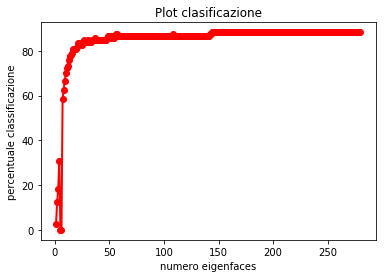

In [919]:
fig2 = plt.figure(figsize=(6,4))
eigenpixel_vals = np.arange(280) + 1
plt.plot(eigenpixel_vals, percentuale_classificazione, 'ro-', linewidth=2)
plt.title('Plot clasificazione')
plt.xlabel('numero eigenfaces')
plt.ylabel('percentuale classificazione')